## 머신러닝 기초학습
---
#### 다음 내용은 '혼자 공부하는 머신러닝'에 대한 내용입니다.
&nbsp;
#### 설명
- 해당 챕터에는 넘파이에 대한 기본적인 설명을 합니다.

In [69]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
# 필수 넘파이
a = [1, 2, 3, 4, 5]
print(np.array(a)) # 리스트를 넘파이의 array로 변환합니다.
print(np.array(a).shape) # 해당 배열의 형태를 반환합니다. 5개의 값으로 이루어져있다는 뜻이고, 5,2의 경우 2차원 배열이됩니다.

[1 2 3 4 5]
(5,)


In [3]:
fish_length = np.array([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])
fish_weight = np.array([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

In [30]:
fish_data = pd.DataFrame({'length':fish_length,
                          'weight':fish_weight})
fish_target = pd.DataFrame(np.concatenate((np.ones(35), np.zeros(14))))

In [13]:
# 0번 데이터부터 34번 데이터까지를 훈련데이터, 나머지를 테스트 데이터라고 지정합니다.
# 통상 훈련셋과 테스트셋의 비율은 8:2, 7:3정도로 지정합니다.
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [14]:
# 테스트셋에 대한 점수가 0입니다.
knc = KNeighborsClassifier()
knc.fit(train_input, train_target)
knc.score(test_input, test_target)

0.0

In [15]:
# 이유는 0번부터 34번까지가 도미데이터이고, 나머지가 빙어 데이터이기 때문입니다.
# 훈련셋에 도미데이터만 학습을 하고, 테스트셋에 빙어 데이터를 물어보면 맞출수가 없습니다.
# 이것을 바로 '샘플링 편향'이라고 합니다.
# 말 그대로 샘플이 한곳으로 치우쳐져있다는 이야기입니다.

In [20]:
# 혹시 시드에 대해서 아시나요? 시드는 게임에서 자주 볼 수 있는데, 특정 시드로 플레이한다고 하잖아요?
# 누가 해당 시드를 플레이하더라도 같은 환경이라는 거죠.
# 넘파이에서 시드도 같습니다. 랜덤하게 값을 조절하면 당연히 누가 쓰더라도 값이 달라질테지만, 시드를 동일하게 '지정'해놓으면 누가 사용하더라도 같은 값이 나옵니다.
np.random.seed(42)
# print(len(fish_data)) # 49
# 물고기 데이터가 49개이므로 해당 인덱스의 범위를 지정하였습니다.
index = np.arange(49)
# 랜덤 모듈에서 지원하는 셔플 함수인데, 괄호안에 값을 섞습니다.(시드가 주어져있으므로 해당 시드에 맞춰서요.)
np.random.shuffle(index)

In [21]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [58]:
# 판다스에서는 해당 행에 대한 정보를 받는 함수가 2개 존재합니다.
# iloc와 loc인데, iloc의 경우 특정 배열의 위치를 지정한다는 것입니다.

In [38]:
language = pd.DataFrame({'프로그래밍 언어':['C++', 'Python', 'Java', 'Php', 'Mysql'],
              '난이도':['상', '중', '상', '하', '하']})

In [41]:
# 일반적인 language의 데이터프레임 형태
language

,프로그래밍 언어,난이도
0,C++,상
1,Python,중
2,Java,상
3,Php,하
4,Mysql,하


In [45]:
# 언어 난이도가 상이라고 분류되어있는 값만 불러왔는데 제일 왼쪽의 값의 차이가 보이시나요?
## 앞에서는 0부 4까지 배열이 있었는데 지금보니 0과 2밖에 없군요.
ex1 = language[language['난이도']=='상']
ex1

,프로그래밍 언어,난이도
0,C++,상
2,Java,상


In [50]:
# 만약 2번째 값을 반환받고 싶을때 두 함수 모두 사용해보죠
language.iloc[1]

프로그래밍 언어    Python
난이도              중
Name: 1, dtype: object

In [49]:
language.loc[1]

프로그래밍 언어    Python
난이도              중
Name: 1, dtype: object

In [51]:
# 모두 같은 수가 나왔군요!
# ex1도 똑같이 해볼까요?
ex1.iloc[1]

프로그래밍 언어    Java
난이도            상
Name: 2, dtype: object

In [57]:
# 예외처리 함수입니다.
try:
    print(ex1.loc[1])
except KeyError:
    print('KeyError가 발생하였습니다.')

KeyError가 발생하였습니다.


In [56]:
# 오류가 발생했네요!
# 두 함수의 차이를 아시겠나요? iloc는 주어진 배열에 따라 해당 번호에 있는 값을 반환합니다.
# 반면에 loc는 해당 배열의 인덱스 값을 반환하는데요, ex2에는 0과 2 인덱스 값만 존재하고, 1의 인덱스 값은 존재하지 않습니다.
# 따라서 iloc와 loc를 다르게 사용하는거죠.

In [60]:
# 해당 값들을 iloc 함수를 이용하여 변수를 할당합니다.
train_input = fish_data.iloc[index[:35]]
train_target = fish_target.iloc[index[:35]]
test_input = fish_data.iloc[index[35:]]
test_target = fish_target.iloc[index[35:]]

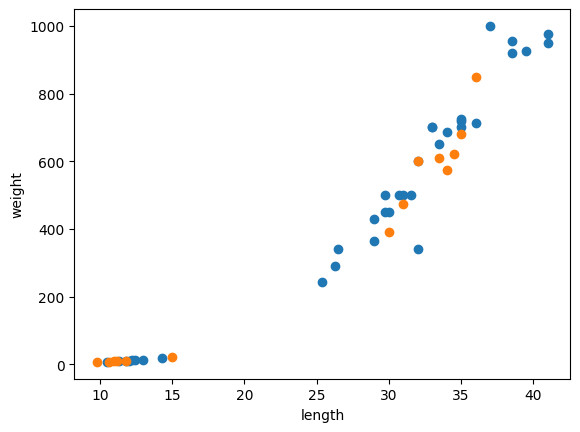

In [66]:
# 주황색이 테스트고, 파란색이 훈련 데이터입니다. 
# 훈련데이터가 양이 더 많으므로 눈에 띄는건 당연한데, 주황색도 안보이지는 않으니 괜찮네요!
plt.scatter(train_input['length'], train_input['weight'])
plt.scatter(test_input['length'], test_input['weight'])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [70]:
knc.fit(train_input, train_target)

KNeighborsClassifier()

In [72]:
# 꽤나 괜찮은 것 같습니다!
print('훈련데이터 성능 : {}'.format(knc.score(train_input, train_target)))
print('테스트데이터 성능 : {}'.format(knc.score(test_input, test_target)))

훈련데이터 성능 : 1.0
테스트데이터 성능 : 1.0
